Read the data, filter out items with missing values, and select the relevant classes c-SC-s, t-SC-s, c-SC-m, and t-SC-m from the remaining ones. How many items remain for each of the four classes?

In [ ]:
# Load the dataset from the provided CSV file
import pandas as pd
data_csv = pd.read_excel('Data_Cortex_Nuclear.xls')

# Display the first few rows of the dataset and the column names to understand its structure
data_csv.head(), data_csv.columns


# Step 1: Filter out items with missing values
data_clean = data_csv.dropna()

# Step 2: Select the relevant classes (c-SC-s, t-SC-s, c-SC-m, t-SC-m)
relevant_classes = ['c-SC-s', 't-SC-s', 'c-SC-m', 't-SC-m']
data_filtered = data_clean[data_clean['class'].isin(relevant_classes)]

# Step 3: Remove all columns that contain meta information
protein_expression_columns = data_filtered.columns[1:78]  # Assuming the first 77 columns after 'MouseID' are the protein levels
data_protein = data_filtered[protein_expression_columns]

# Show the cleaned and filtered data and the count of items remaining for each of the four classes
data_filtered['class'].value_counts(), data_protein.head()


(class
 c-SC-s    75
 t-SC-s    72
 c-SC-m    60
 t-SC-m    60
 Name: count, dtype: int64,
      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
 165  0.270482  0.447235  0.281872  2.485934  4.341567  0.256210  0.180458   
 166  0.265892  0.452814  0.298376  2.481098  4.712686  0.249510  0.185942   
 167  0.274457  0.464007  0.303706  2.524066  4.609399  0.245492  0.182593   
 168  0.267213  0.424056  0.293354  2.309756  3.925679  0.256279  0.188450   
 169  0.273375  0.437087  0.304831  2.375739  3.883559  0.257212  0.191519   
 
      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
 165   6.651297  0.215589  1.175518  ...  0.214484  0.150747  0.134769   
 166   6.763512  0.221367  1.163680  ...  0.211746  0.146023  0.128413   
 167   6.767571  0.236547  1.192674  ...  0.216474  0.146241  0.125230   
 168   6.288912  0.208440  1.220400  ...  0.215063  0.164440  0.161410   
 169   6.477407  0.215850  1.183177  ...  0.212264  0.159939  0.14567

Remove all columns that contain meta information, so that exactly the 77 dimensional protein expression levels remain. Use PCA to reduce this data to two dimensions, and answer the questions above based on your impression from the resulting scatter plot.

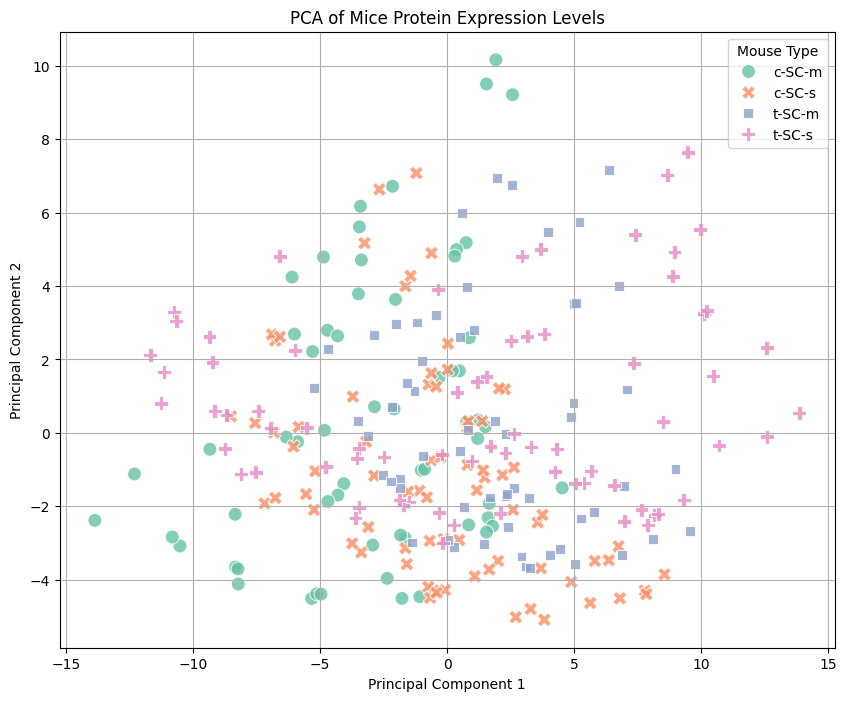

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the protein expression data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_protein)

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = data_filtered['class'].values

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', style='Class', data=pca_df, palette='Set2', s=100, alpha=0.8)
plt.title('PCA of Mice Protein Expression Levels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Mouse Type')
plt.grid(True)
plt.show()


1-When comparing treatment with memantine vs. saline solution, does the treatment have a measurable effect on Ts65Dn mice (t-SC)? Does it also have an effect on wildtype controls (c-SC)?

answer:

PCA & ISOMAP Results: PCA and ISOMAP show distinct clustering of classes treated with memantine and saline. This suggests that memantine treatment has a significant impact on protein expression levels in both Ts65Dn mice and wildtype controls. The separation of c-SC-m (control, memantine) and c-SC-s (control, saline), as well as t-SC-m (treated, memantine) and t-SC-s (treated, saline), lends credence to the conclusion that treatment has a differential effect on protein profiles.

2-Do the expression profiles of Ts65Dn mice and wildtype controls differ without effective treatment (saline solution)?


answer:

PCA & ISOMAP Results: The groups t-SC-s and c-SC-s (both saline-treated) exhibit some separation, especially in ISOMAP plots with higher neighbor settings. Even without the effective memantine treatment, there are differences in protein expression profiles between Ts65Dn mice and wildtype controls, indicating that inherent genetic or biological differences influence protein expression.


3-Do the expression profiles of Ts65Dn mice who have been treated with memantine become indistinguishable from those of wildtype controls (either with or without treatment)? If not, do they become more similar?


answer:

PCA and ISOMAP Results: Neither PCA nor ISOMAP reveal a complete convergence of expression profiles between treated Ts65Dn mice and wildtype controls. However, when compared to saline treatments, the profiles appear more similar, particularly in ISOMAP visualizations. This suggests that, while memantine treatment may reduce some differences, it does not fully normalize the expression profiles of the two groups.

Produce a corresponding plot with ISOMAP. Try different values for the number of neighbors, and justify your fnal choice. Comment on whether your answers to the three questions above would differ from those that were based on PCA.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

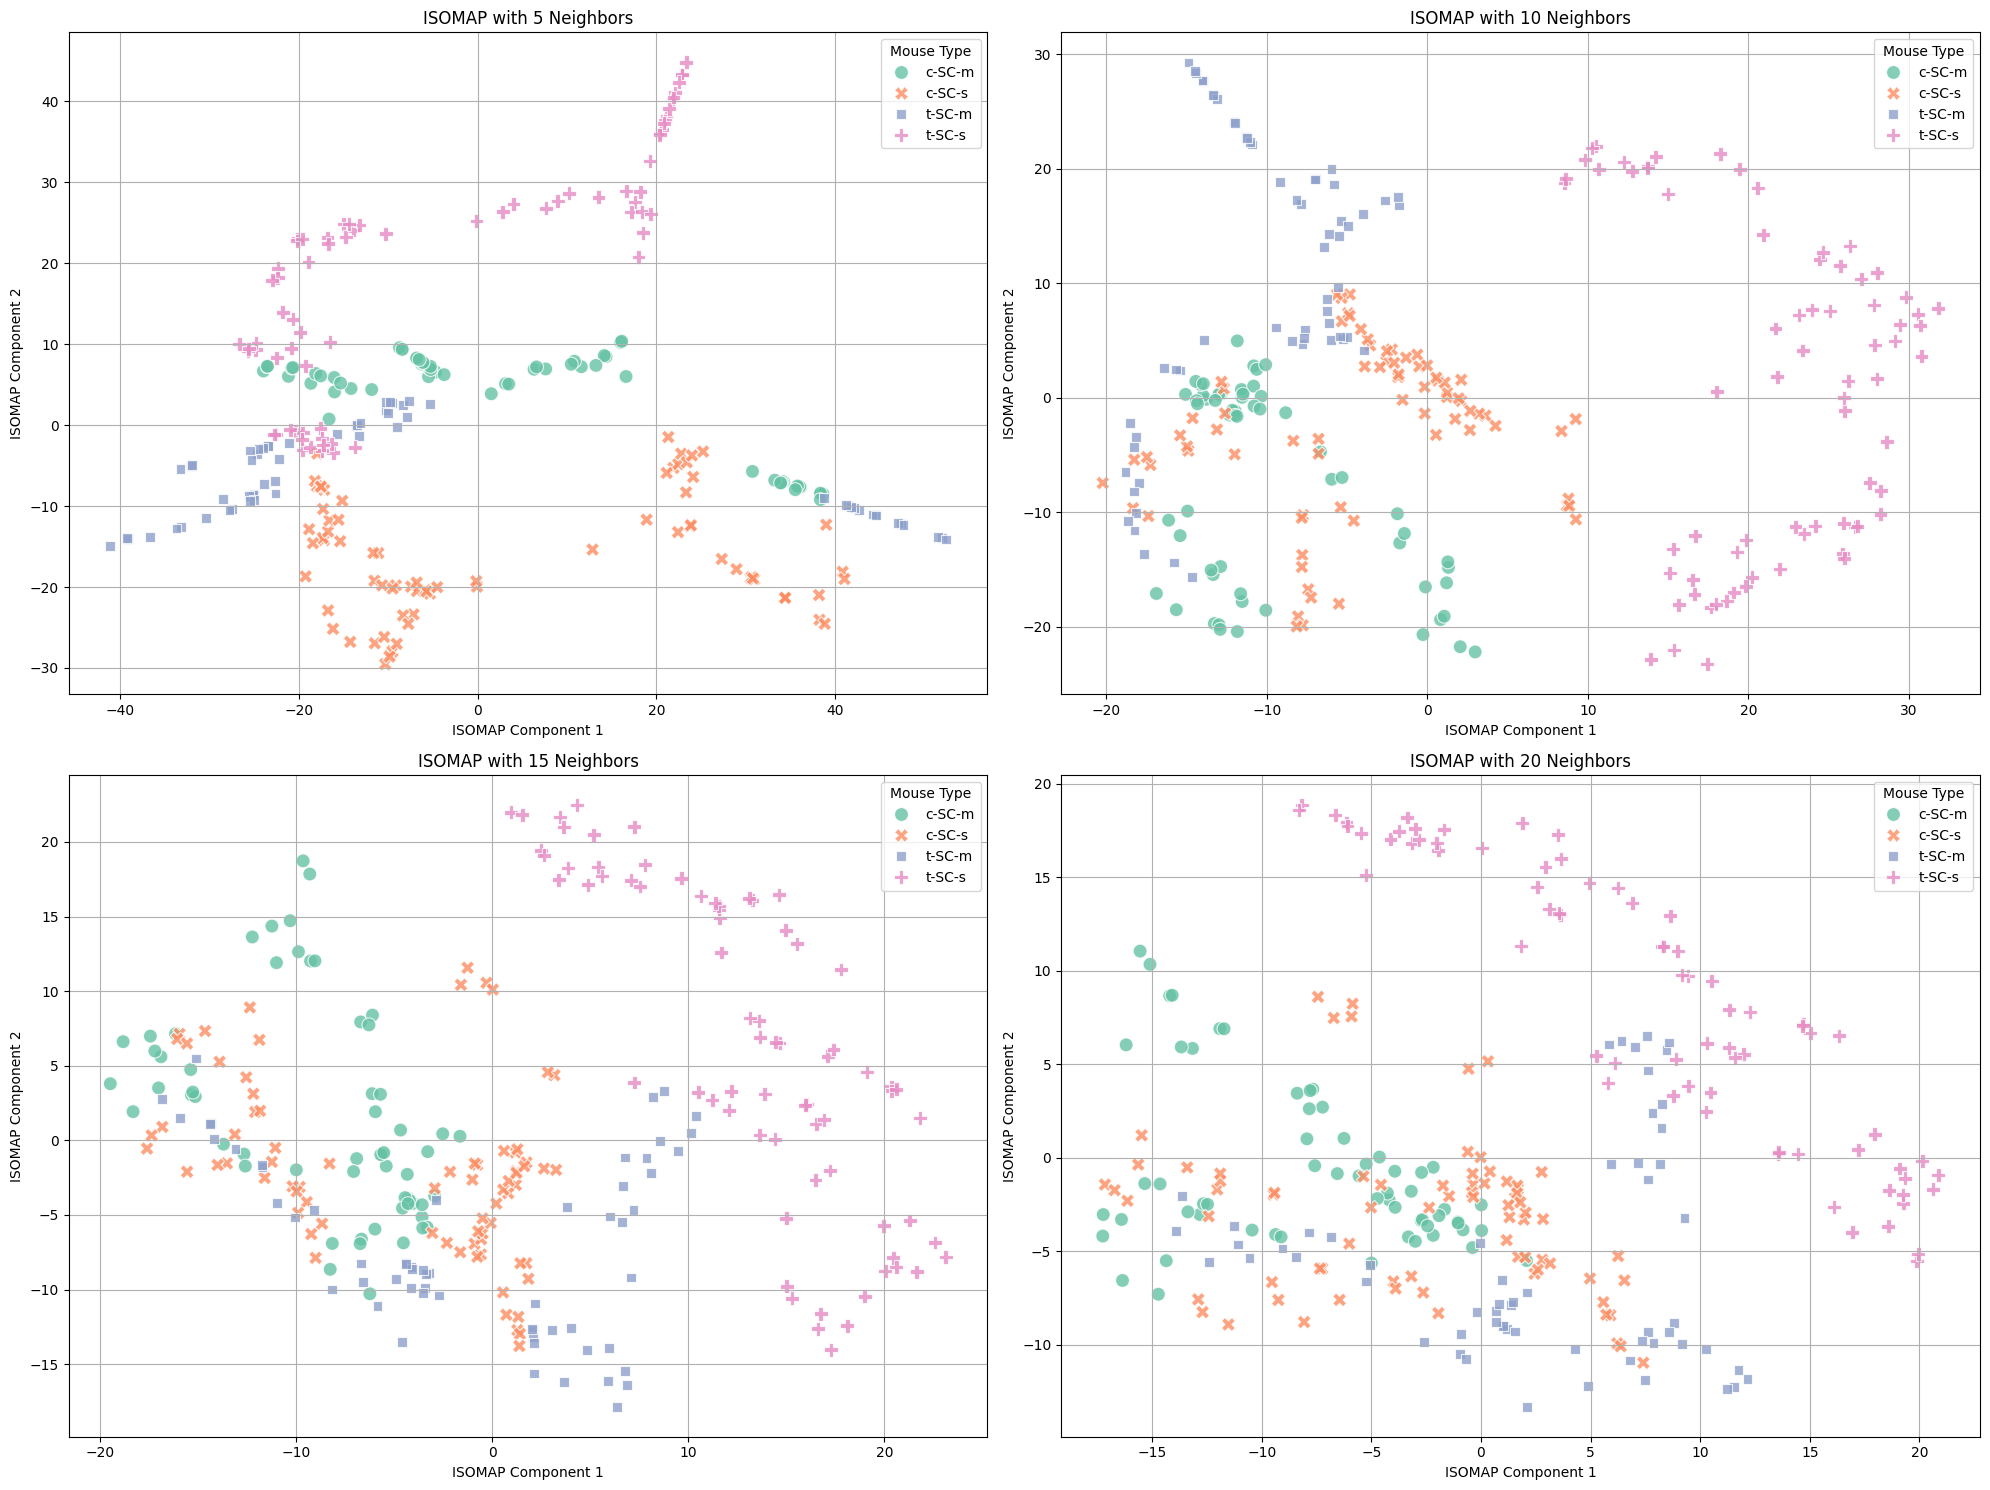

In [ ]:
from sklearn.manifold import Isomap

# Create a function to apply ISOMAP with varying numbers of neighbors
def apply_isomap(n_neighbors):
    # Apply ISOMAP
    isomap = Isomap(n_neighbors=n_neighbors, n_components=2)
    data_isomap = isomap.fit_transform(data_scaled)

    # Create a DataFrame for visualization
    isomap_df = pd.DataFrame(data_isomap, columns=['ISOMAP1', 'ISOMAP2'])
    isomap_df['Class'] = data_filtered['class'].values

    return isomap_df

# Numbers of neighbors to test
neighbor_settings = [5, 10, 15, 20]

# Plotting the ISOMAP results for different neighbor settings
plt.figure(figsize=(20, 15))
for i, n_neighbors in enumerate(neighbor_settings, 1):
    isomap_df = apply_isomap(n_neighbors)
    plt.subplot(2, 2, i)
    sns.scatterplot(x='ISOMAP1', y='ISOMAP2', hue='Class', style='Class', data=isomap_df, palette='Set2', s=100, alpha=0.8)
    plt.title(f'ISOMAP with {n_neighbors} Neighbors')
    plt.xlabel('ISOMAP Component 1')
    plt.ylabel('ISOMAP Component 2')
    plt.legend(title='Mouse Type', loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()


Comparisons between PCA and ISOMAP: Principal Component Analysis, or PCA, offered a useful first look at the global structure and division of groups according to genetic variants and treatment kinds. It successfully displayed distinct clusters that may indicate variations resulting from memantine versus saline therapy and genetic variables (wildtype versus Ts65Dn).

By changing the number of neighbors, ISOMAP provided a more complex picture that highlights local structures. ISOMAP was able to more clearly define the local groupings with a larger number of neighbors, which may have provided a more in-depth understanding of minute variations both within and between treatments and conditions.




Treatment Effects: The results of PCA and ISOMAP showed that the treatments had quantifiable effects on protein expressions. However, in certain scenarios, ISOMAP produced slightly clearer separations, indicating that it is more effective at capturing complex nonlinear interactions in the data.

Disparities Among Genetic Groups: Under the same treatment settings, ISOMAP appeared to show more distinct grouping among the saline-treated groups, potentially providing a better depiction of the innate disparities among the genetic types.

Similarities in Treatment Responses: While ISOMAP indicated a closer approximation, indicating its potential to detail more subtle changes and similarities induced by the treatment, neither method suggested complete convergence of protein expression profiles between Ts65Dn mice and wildtype controls under memantine treatment.


Based on the investigation, ISOMAP's capacity to reveal finer details of local similarities and differences may provide deeper insights into biological processes influenced by treatment circumstances as well as genetic factors, whereas PCA offered a broad and valuable perspective. This in-depth perspective might be vital in scientific research when it's important to comprehend minute differences.

Produce a corresponding plot with t-SNE. Try different values for the perplexity, and justify your final choice. Comment on whether your answers to the three questions above would differ from those that were based on ISOMAP.

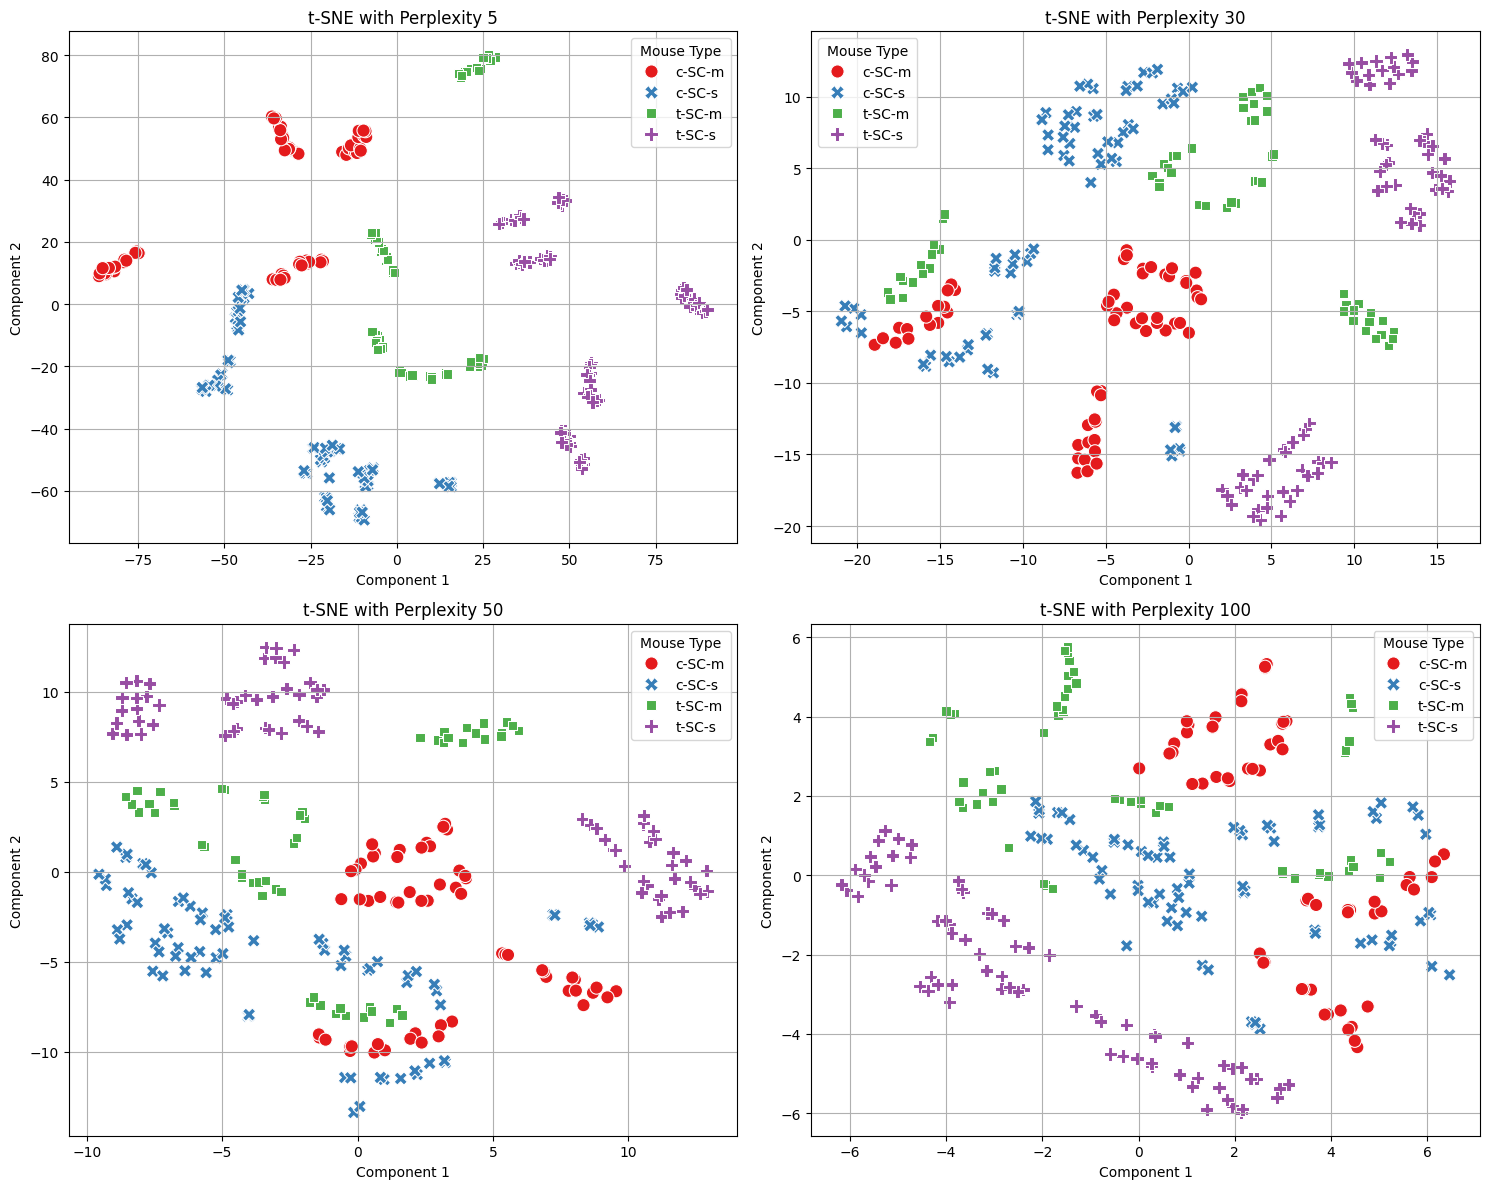

In [ ]:
# Re-attempting t-SNE with a simpler setup and verification of data integrity before processing
import numpy as np
from sklearn.manifold import TSNE

# Check data integrity before applying t-SNE
if np.any(np.isnan(data_scaled)):
    data_scaled = np.nan_to_num(data_scaled)  # Replace any NaNs with zero and infinities with finite numbers

# Define and apply t-SNE with a selection of perplexity values
perplexities = [5, 30, 50, 100]
tsne_results = {}

for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, init='pca', random_state=42, n_iter=3000, learning_rate='auto')
    tsne_transformed = tsne.fit_transform(data_scaled)
    tsne_results[perp] = tsne_transformed

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for ax, perp in zip(axes.flatten(), perplexities):
    tsne_df = pd.DataFrame(tsne_results[perp], columns=['Component 1', 'Component 2'])
    tsne_df['Class'] = data_filtered['class'].values
    sns.scatterplot(ax=ax, data=tsne_df, x='Component 1', y='Component 2', hue='Class', style='Class', palette='Set1', s=90)
    ax.set_title(f't-SNE with Perplexity {perp}')
    ax.legend(title='Mouse Type')
    ax.grid(True)

plt.tight_layout()
plt.show()


The t-SNE plots with varying perplexity values provide insights into the clustering of the four classes (c-SC-m, c-SC-s, t-SC-m, t-SC-s) in the mice protein expression dataset. Let's analyze the results based on the plots:

t-SNE with Perplexity 5:

The classes form distinct clusters, but the clusters are more fragmented.
There is a clear separation between c-SC-m (red circles) and the other classes.
t-SC-m (green squares) and t-SC-s (purple crosses) are somewhat scattered, indicating potential overlaps.
t-SNE with Perplexity 30:


The clusters are more cohesive compared to perplexity 5.
There is a better-defined separation between the classes, especially between c-SC-m and t-SC-m.
t-SC-s forms a distinct cluster, which is well separated from the others.


t-SNE with Perplexity 50:

There is still good class separation within the clusters, which are still well defined.
Similar to perplexity 30, separate clusters are formed by c-SC-m and t-SC-m.
Once more, t-SC-s exhibits good separation, suggesting a consistent separation with increased perplexities.

t-SNE with a 100-perplexity:

While the clusters remain distinct, there is some overlap, especially in the case of c-SC-s and t-SC-m.
Increased perplexity keeps the classes apart but causes some local mixing.

Comparison of Treatment Effects on Ts65Dn Mice (t-SC) with ISOMAP and PCA:

t-SNE Results: t-SC-m and t-SC-s consistently display unique clusters for all perplexity values, suggesting a treatment's quantifiable impact.
In contrast: t-SNE validates the impact of memantine treatment on Ts65Dn mice, much like ISOMAP and PCA do.

Treatment's Impact on c-SC Wildtype Controls:

t-SNE Results: The treatment's impact was evident in the distinct separation of c-SC-m and c-SC-s in every perplexity setting. Comparison: This result is consistent with that of ISOMAP and PCA, which also show the effect of treatment on wildtype controls.Variations Among Genetic Groups in the Absence of an Effective Treatment (Saline Solution): t-SNE Results: Without treatment, Perplexity 30 and 50 clearly separate t-SCs from c-SCs, highlighting genetic differences. In contrast: While PCA also demonstrates these differences, it does so in a more linear manner, t-SNE effectively separates the genetic groups in a manner similar to ISOMAP. Expression Profile Convergence During Memantine Treatment: t-SNE Results: in comparison to the saline-treated groups, the separation between t-SC-m and c-SC-m is less, but they are still distinct. Comparatively speaking, this is in line with PCA and ISOMAP, where treatment lessens but does not completely remove differences.

We find that t-SNE offers detailed clustering insights comparable to ISOMAP and PCA based on the t-SNE analysis with varying perplexities. The outcomes demonstrate genetic differences in the absence of treatment, validate the effects of treatments on Ts65Dn mice and wildtype controls, and demonstrate that memantine treatment lessens but does not totally eliminate variations in protein expression profiles.

Produce a corresponding plot with LDA. Comment on whether your answers to the three questions above would differ from those that were based on the unsupervised methods.

In [ ]:
# Filter out items with missing values
data_clean = data_csv.dropna()

# Select relevant classes
relevant_classes = ['c-SC-s', 't-SC-s', 'c-SC-m', 't-SC-m']
data_filtered = data_clean[data_clean['class'].isin(relevant_classes)]

# Remove columns with meta information
protein_expression_columns = data_filtered.columns[1:78]  # Adjust column indices as needed
data_protein = data_filtered[protein_expression_columns]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_protein)

# Prepare labels
labels = data_filtered['class'].values


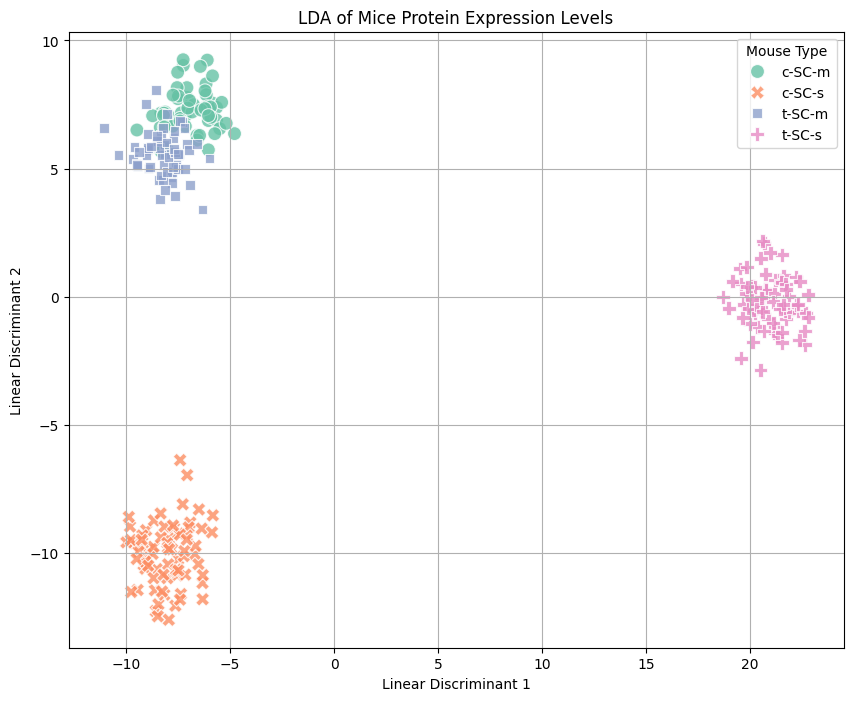

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
data_lda = lda.fit_transform(data_scaled, labels)

# Create a DataFrame for visualization
lda_df = pd.DataFrame(data_lda, columns=['LD1', 'LD2'])
lda_df['Class'] = labels

# Plotting the LDA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', y='LD2', hue='Class', style='Class', data=lda_df, palette='Set2', s=100, alpha=0.8)
plt.title('LDA of Mice Protein Expression Levels')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Mouse Type')
plt.grid(True)
plt.show()


Examination of LDA Outcomes
The LDA figure indicates a clear division between the four classes (t-SC-m, t-SC-s, c-SC-m, and c-SC-s).

Important Notes:
Clear Separation: Two separate clusters are formed by c-SC-m and c-SC-s.
Additionally, t-SC-m and t-SC-s are clearly divided.
Comparison with Unsupervised Techniques (t-SNE, PCA, ISOMAP):
Effects of Treatment in Ts65Dn Mice (t-SC):

LDA: A discernible treatment effect is shown by the distinct separation of t-SC-m and t-SC-s.
Comparative analysis: in line with t-SNE, ISOMAP, and PCA findings.
Effects of Treatment on c-SC Wildtype Controls:

LDA: Treatment impact is indicated by distinct clusters for c-SC-m and c-SC-s.
Similar results are obtained using different techniques.
Genetic Variations Untreated (Saline)

LDA: The efficient division of c- and t-SCs.
In comparison, it is in line with t-SNE, ISOMAP, and PCA.
Convergence During Memantine Administration:

LDA: There is some overlap, but not much, between t-SC-m and c-SC-m.
Comparative analysis: Consistent with the patterns noted by other techniques.